In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Preparing Dataset

In [ ]:
tcga_normal = pd.read_csv("/content/comnormal.csv")
tcga_normal=tcga_normal.drop(tcga_normal.columns[0], axis=1)
tcga_normal=tcga_normal.drop(tcga_normal.columns[0], axis=1)
tcga_normal['y']="Normal"

tcga_blca = pd.read_csv("/content/comblca.csv")
tcga_blca=tcga_blca.drop(tcga_blca.columns[0], axis=1)
tcga_blca=tcga_blca.drop(tcga_blca.columns[0], axis=1)
tcga_blca['y']="BC"

urine_normal = pd.read_csv("/content/NL_100k_cyto_hg19.csv")
urine_normal=urine_normal.drop(urine_normal.columns[0], axis=1)
urine_normal=urine_normal.drop(urine_normal.columns[0], axis=1)
urine_normal['y']="Normal"

urine_blca = pd.read_csv("/content/BLCA_100k_cyto_hg19.csv")
urine_blca=urine_blca.drop(urine_blca.columns[0], axis=1)
urine_blca=urine_blca.drop(urine_blca.columns[0], axis=1)
urine_blca['y']="BC"

In [ ]:
print("====tcga_normal====")
print("dim : ",tcga_normal.shape)

print()
print("====tcga_blca====")
print("dim : ",tcga_blca.shape)

print()
print(len(tcga_normal.columns.intersection(tcga_blca.columns)))
print(tcga_normal.columns.difference(tcga_blca.columns))

tcga = pd.concat([tcga_normal, tcga_blca], axis=0, join='inner')
print()
print(tcga.shape)

tcga = tcga.rename(columns={'Sample':'id'})

====tcga_normal====
dim :  (388, 788)

====tcga_blca====
dim :  (409, 787)

787
Index(['<NA>'], dtype='object')

(797, 787)


In [ ]:
print("====urine_normal====")
print("dim : ",urine_normal.shape)

print()
print("====urine_blca====")
print("dim : ",urine_blca.shape)

print()
print(len(urine_normal.columns.intersection(urine_blca.columns)))

urine = pd.concat([urine_normal, urine_blca], axis=0, join='inner')
print()
print(urine.shape)

====urine_normal====
dim :  (28, 765)

====urine_blca====
dim :  (42, 765)

765

(70, 765)


In [ ]:
# tcga data <-> urine data
print("====tcga====")
print("dim : ",tcga.shape)

print()
print("====urine====")
print("dim : ",urine.shape)

print()
print(len(urine.columns.intersection(tcga.columns)))

# 겹치지 않는 컬럼 제거
common_columns = list(set(urine.columns).intersection(tcga.columns))

# 최종 데이터
urinef = urine[common_columns]
tcgaf = tcga[common_columns]

print()
print("====tcga final====")
print("dim : ",tcgaf.shape)

print()
print("====urine final====")
print("dim : ",urinef.shape)

print()
print("====difference====")
print(tcgaf.columns.difference(urinef.columns))

====tcga====
dim :  (797, 787)

====urine====
dim :  (70, 765)

763

====tcga final====
dim :  (797, 763)

====urine final====
dim :  (70, 763)

====difference====
Index([], dtype='object')


In [ ]:
len(set(urine.columns).intersection(tcga.columns))

763

In [ ]:
tcgaf.to_csv("/content/tcgaf.csv")
urinef.to_csv("/content/urinef.csv")

## EDA

In [ ]:
tcgaf = pd.read_csv("/content/tcgaf.csv")
tcgaf=tcgaf.drop(tcgaf.columns[0], axis=1)

urinef = pd.read_csv("/content/urinef.csv")
urinef=urinef.drop(urinef.columns[0], axis=1)

### 기본 정보 확인

In [ ]:
tcgaf.shape

(797, 763)

In [ ]:
urinef.shape

(70, 763)

In [ ]:
sum(tcgaf.isnull().sum())

0

In [ ]:
sum(urinef.isnull().sum())

0

In [ ]:
tcgaf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 408
Columns: 763 entries, cyto.19q13.43 to cyto.3p22.1
dtypes: float64(762), object(1)
memory usage: 4.6+ MB


### y 분포 확인

In [ ]:
tcgaf.y.value_counts()

BC        409
Normal    388
Name: y, dtype: int64

In [ ]:
urinef.y.value_counts()

BC        42
Normal    28
Name: y, dtype: int64

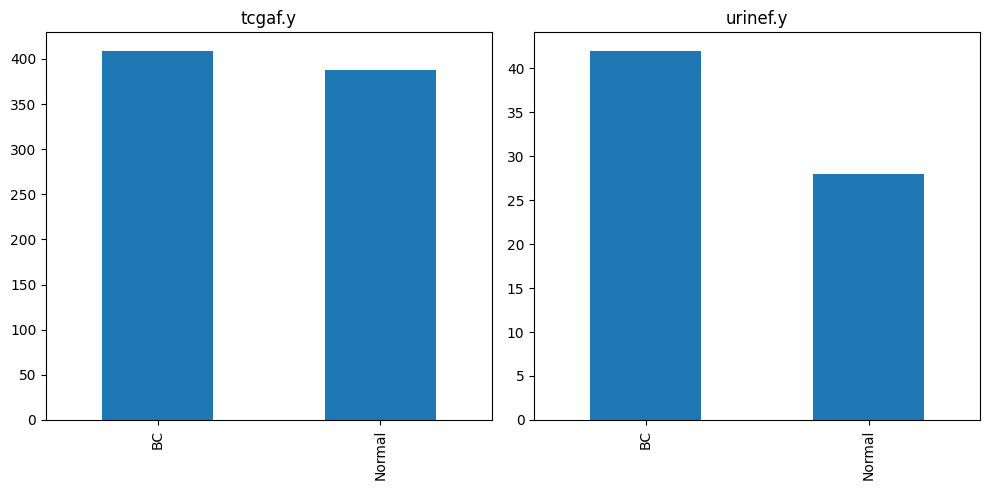

In [ ]:
import matplotlib.pyplot as plt

tcgaf_data = tcgaf.y
urinef_data = urinef.y

plt.figure(figsize=(10, 5))

# 첫 번째 subplot
plt.subplot(1, 2, 1)
tcgaf_data.value_counts().plot(kind='bar')
plt.title('tcgaf.y')

# 두 번째 subplot
plt.subplot(1, 2, 2)
urinef_data.value_counts().plot(kind='bar')
plt.title('urinef.y')


plt.tight_layout()
plt.show()

### column별 비교

In [ ]:
print("===tcgaf.mean().nlargest(5)===")
print(tcgaf.mean().nlargest(5))

print()
print("===tcgaf.mean().nsmallest(5)===")
print(tcgaf.mean().nsmallest(5))

===tcgaf.mean().nlargest(5)===
cyto.8q22.2    0.160822
cyto.8q22.3    0.145165
cyto.8q23.1    0.120719
cyto.8q22.1    0.116818
cyto.1q23.3    0.114179
dtype: float64

===tcgaf.mean().nsmallest(5)===
cyto.9p21.3   -0.202153
cyto.8p22     -0.165666
cyto.8p21.3   -0.161053
cyto.8p23.2   -0.159812
cyto.8p23.1   -0.159053
dtype: float64


<ipython-input-18-85203b39be92>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tcgaf.mean().nlargest(5))
<ipython-input-18-85203b39be92>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tcgaf.mean().nsmallest(5))


<ipython-input-15-ee33876e6477>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_5_columns = tcgaf.mean().nlargest(5).index.tolist()
<ipython-input-15-ee33876e6477>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bottom_5_columns = tcgaf.mean().nsmallest(5).index.tolist()


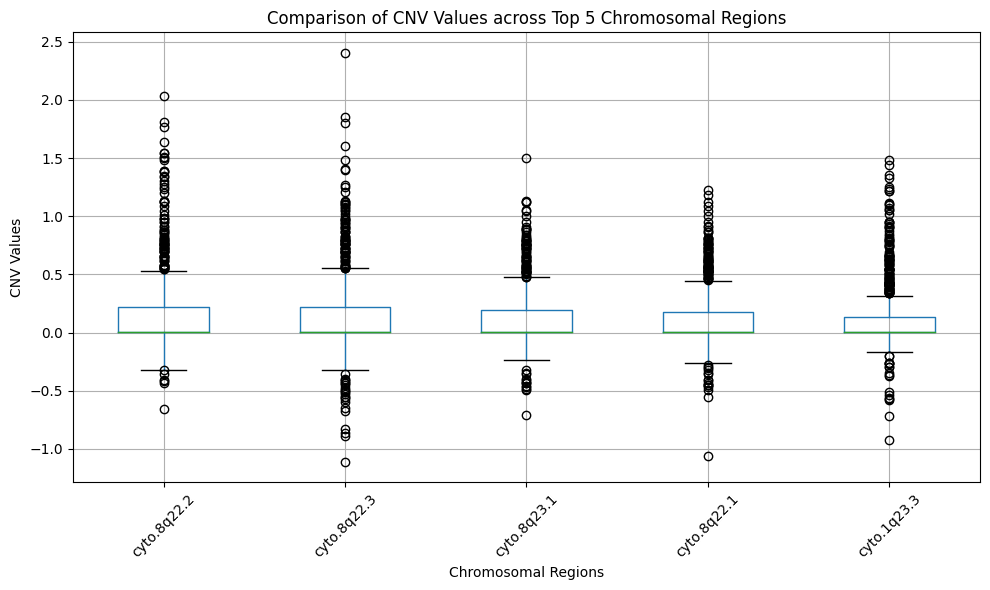

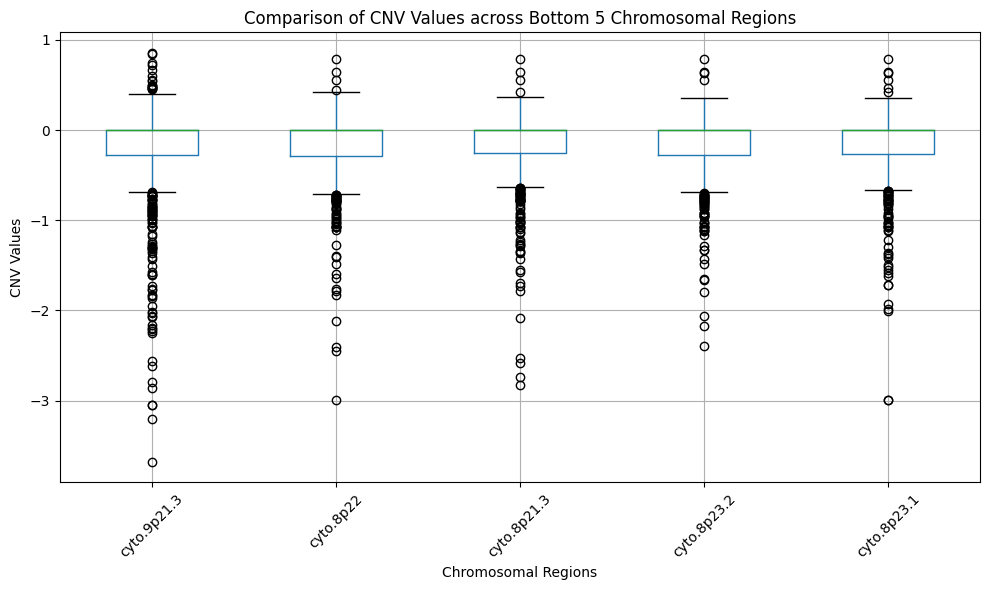

In [ ]:
top_5_columns = tcgaf.mean().nlargest(5).index.tolist()
bottom_5_columns = tcgaf.mean().nsmallest(5).index.tolist()

plt.figure(figsize=(10, 6))
tcgaf[top_5_columns].boxplot()
plt.title('Comparison of CNV Values across Top 5 Chromosomal Regions')
plt.xlabel('Chromosomal Regions')
plt.ylabel('CNV Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 하위 5개 염색체 영역에 대한 상자 그림
plt.figure(figsize=(10, 6))
tcgaf[bottom_5_columns].boxplot()
plt.title('Comparison of CNV Values across Bottom 5 Chromosomal Regions')
plt.xlabel('Chromosomal Regions')
plt.ylabel('CNV Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### case에 따른 cnv 정보 변화 추이

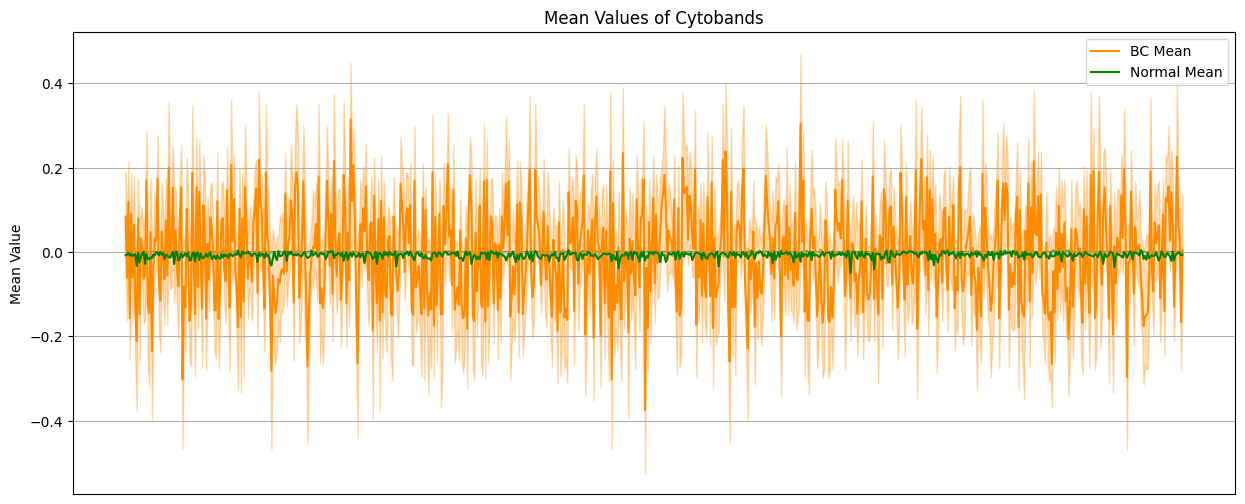

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_columns = tcgaf.drop(columns=['y']).columns
tcgaf[numeric_columns] = tcgaf[numeric_columns].apply(pd.to_numeric, errors='coerce')

normal_data = tcgaf[tcgaf['y'] == 'Normal'].drop(columns=['y'])
bc_data = tcgaf[tcgaf['y'] == 'BC'].drop(columns=['y'])

q1_normal = normal_data.quantile(0.25, axis=0)
q2_normal = normal_data.median(axis=0)
q3_normal = normal_data.quantile(0.75, axis=0)
mean_normal = normal_data.mean()

q1_bc = bc_data.quantile(0.25, axis=0)
q2_bc = bc_data.median(axis=0)
q3_bc = bc_data.quantile(0.75, axis=0)
mean_bc = bc_data.mean()

plt.figure(figsize=(15, 6))

plt.plot(mean_bc, marker='', linestyle='-', color='#FF8C00', label='BC Mean')
plt.fill_between(mean_bc.index, q1_bc, q3_bc, color='#FF8C00', alpha=0.3)

plt.plot(mean_normal, marker='', linestyle='-', color='green', label='Normal Mean')
plt.fill_between(mean_normal.index, q1_normal, q3_normal, color='green', alpha=0.5)

plt.xlabel('')
plt.ylabel('Mean Value')
plt.title('Mean Values of Cytobands')
plt.xticks([])
plt.grid(True)
plt.legend()
plt.show()


### 염색체 영역에 대해 normal 그룹과 blca 그룹의 CNV 값 분포 비교
- 출력된 p-value 값이 유의 수준 (0.05)보다 작으면, 두 그룹 간의 CNV 값에는 통계적으로 유의한 차이

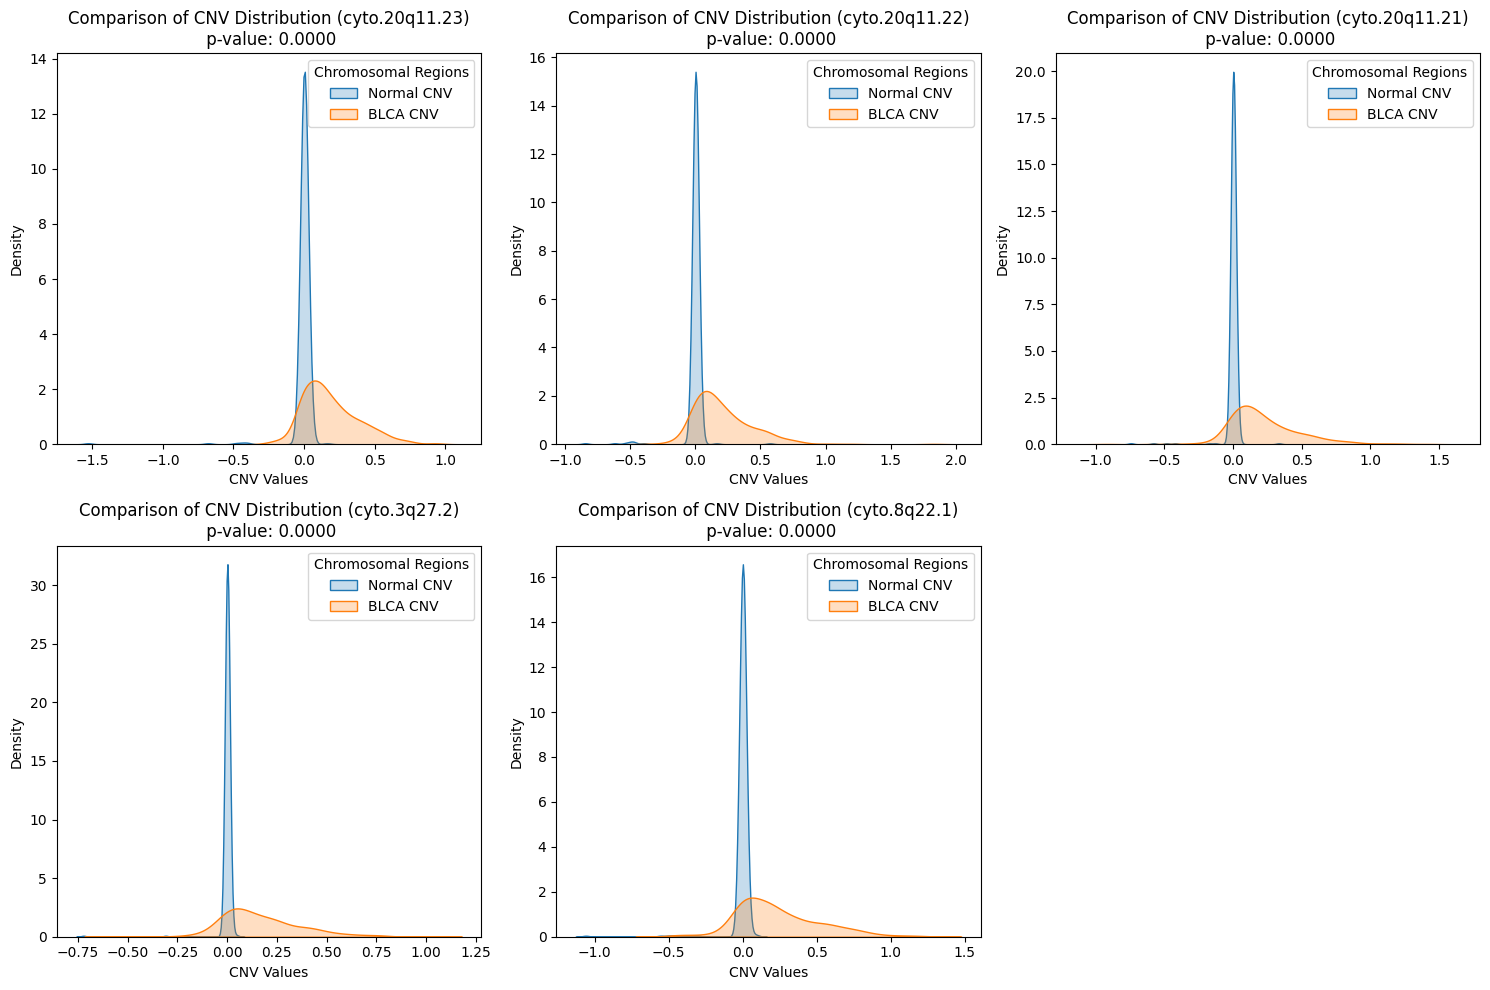

In [ ]:
import warnings
warnings.filterwarnings("ignore")

significant_columns = []

numeric_columns = tcgaf.select_dtypes(include=['float64']).columns

normal_cnv = tcgaf[tcgaf['y'] == 'Normal']
blca_cnv = tcgaf[tcgaf['y'] == 'BC']

p_values = {}
for column in numeric_columns:
    t_stat, p_value = ttest_ind(normal_cnv[column], blca_cnv[column])
    p_values[column] = p_value

# p-value가 낮은 순으로 정렬
sorted_p_values = sorted(p_values.items(), key=lambda x: x[1])

# 상위 5개 염색체 영역에 대한 시각화
plt.figure(figsize=(15, 10))
for i, (column, p_value) in enumerate(sorted_p_values[:5]):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(normal_cnv[column], label='Normal CNV', shade=True)
    sns.kdeplot(blca_cnv[column], label='BLCA CNV', shade=True)
    plt.title(f'Comparison of CNV Distribution ({column})\n p-value: {p_value:.4f}')
    plt.xlabel('CNV Values')
    plt.ylabel('Density')
    plt.legend(title='Chromosomal Regions')
plt.tight_layout()
plt.show()

In [ ]:
len(significant_columns)

667

### 염색체 영역 간 상관성

In [ ]:
import pandas as pd

correlation_matrix = tcgaf.corr().abs()
correlation_values = correlation_matrix.unstack()
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

top_20_correlations = correlation_values.sort_values(ascending=False).head(20)

print("Top 20 Correlated Column Pairs:")
print(top_20_correlations)


Top 20 Correlated Column Pairs:
cyto.1p11.2    cyto.1q21.1      1.000000
cyto.3p21.32   cyto.3p21.33     0.982452
cyto.15q15.2   cyto.15q15.3     0.971546
cyto.15q22.32  cyto.15q22.33    0.955006
cyto.10q24.32  cyto.10q24.33    0.950616
cyto.3q12.2    cyto.3q12.3      0.925785
cyto.10q23.32  cyto.10q24.1     0.924865
cyto.5p14.1    cyto.5p14.2      0.924377
cyto.3p26.2    cyto.3p26.3      0.924132
cyto.13q14.12  cyto.13q14.13    0.915749
cyto.5p14.2    cyto.5p14.3      0.915359
cyto.8q11.22   cyto.8q11.23     0.912711
cyto.3q21.1    cyto.3q21.2      0.910722
cyto.5q12.2    cyto.5q12.3      0.910556
cyto.15q13.1   cyto.15q13.2     0.910170
cyto.9q22.1    cyto.9q22.2      0.907102
cyto.3q27.1    cyto.3q27.2      0.906506
cyto.6q22.32   cyto.6q23.1      0.904281
cyto.14q32.31  cyto.14q32.32    0.903880
cyto.13q22.2   cyto.13q22.3     0.903514
dtype: float64


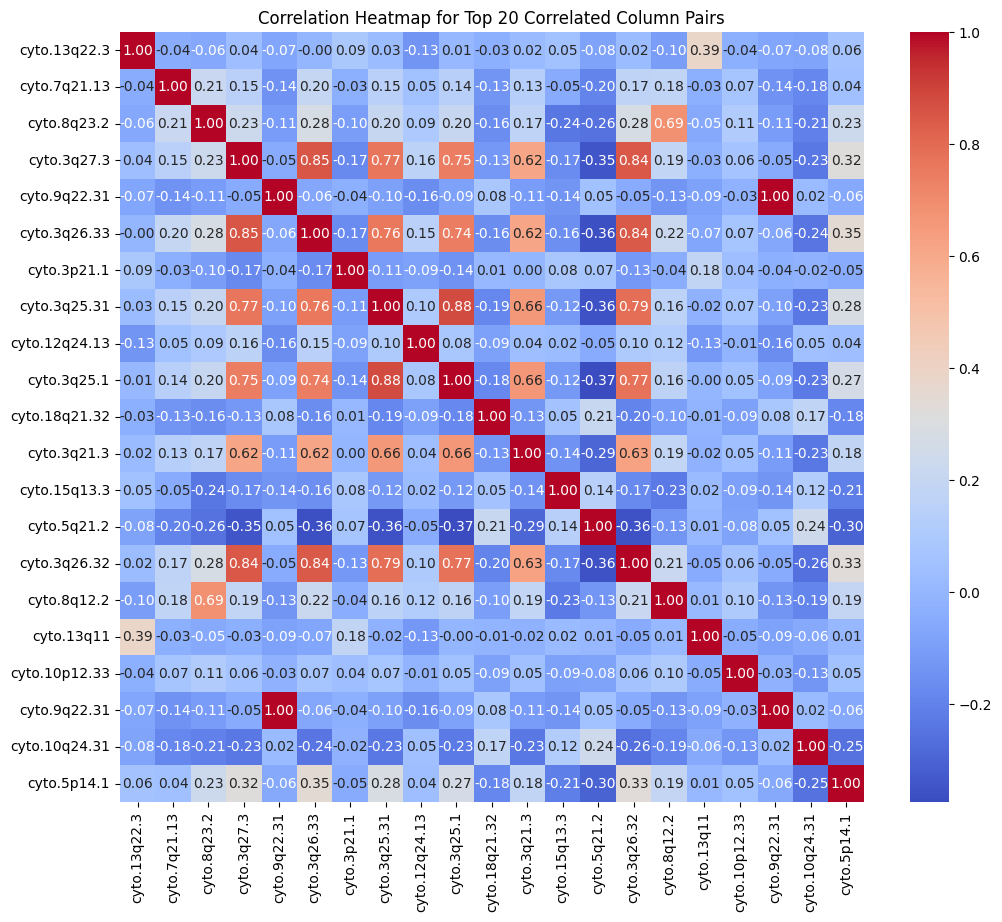

In [ ]:
top_20_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(41)[20:]
top_20_columns = [pair for pair, _ in top_20_correlations.index]
top_20_correlation_data = tcgaf[top_20_columns]

plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Top 20 Correlated Column Pairs')
plt.show()